# <font color=4CBB17>**PROYECTO KAGGLE**</font>

<font color=FF7F50><h3><b>Estudiante:</b></font> Mateo Toro López</h3>
<font color=FF7F50><h3><b>Programa:</b></font> Ingeniería Industrial</h3>


### <font color=1E90FF>**Descripción**</font>

Las **Pruebas Saber Pro** son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del **Gobierno de Colombia** para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan de cinco componentes genéricos: **Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita**.

El trabajo será crear un modelo de clasificación que, para cada estudiante, prediga qué desempeño va a tener: **bajo, medio-bajo, medio-alto o alto**.


## <font color=4CBB17>**Librerias**</font>


In [1]:
# Datos
import pandas as pd
import numpy as np
from itertools import product

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelado

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import classification_report
import math


from collections import Counter
import time

# Para modelo Random Forest
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



# <font color=4CBB17>**1. Descargar la base de datos desde Kaggle**</font>
## <font color=FF7F50>**Descargar la base de datos desde Kaggle**</font>

### <font color=1E90FF>**Instrucciones**</font>

**1.** Crea un archivo kaggle.json con tu token de autenticación (en kaggle → haz clic en el ícono de usuario en la esquina superior derecha → configuración → API crear nuevo token)

**2.** Subir el archivo kaggle.json a este espacio de trabajo de Colab ⬇️

In [2]:
#Subir el archivo kaggle.json a este espacio de trabajo de Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


**3.** Correr la sigiente celda ⬇️

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

100% 20.1M/20.1M [00:00<00:00, 210MB/s]
100% 20.1M/20.1M [00:00<00:00, 209MB/s]


### <font color=1E90FF>**Descomprimir e inspeccionar datos**</font>


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


### <font color=1E90FF>**cargar `train.csv` con pandas**</font>


In [6]:
# Librerias para procesamiento
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [7]:
# Cuantas filas y columnas tiene el dataframe
rows, columns = df.shape
print(f"Número de filas: {rows}")
print(f"Número de columnas: {columns}")

Número de filas: 692500
Número de columnas: 12


# <font color=4CBB17>**2. Análisis exploratorio**</font>


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [9]:
df['PERIODO'] = df['PERIODO'].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  object
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(1), object(11)
memory

In [11]:
# Primeras 5 filas del dataframe
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [12]:
# Ultimas 5 filas del dataframe
df.tail()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No,alto


In [13]:
# Cantidad de nulos por columna
dfnull = df.isnull().sum(axis=0) # axis=0 me indica que sea por columnas
dfnull

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [14]:
totalfilas = len(df)
totalfilas

692500

In [15]:
# Porcentaje de nulos por cada columna
porcentaje_null = pd.DataFrame({"Porcentaje nulos":((dfnull / totalfilas) * 100)})
porcentaje_null

,Porcentaje nulos
ID,0.000000
PERIODO,0.000000
ESTU_PRGM_ACADEMICO,0.000000
ESTU_PRGM_DEPARTAMENTO,0.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.907870
ESTU_HORASSEMANATRABAJA,4.455884
FAMI_ESTRATOVIVIENDA,4.640722
FAMI_TIENEINTERNET,3.845343
FAMI_EDUCACIONPADRE,3.347004
FAMI_EDUCACIONMADRE,3.417184


> **Se encuentra que el porcentaje de nulos por columna no es significativo en ninguna columna**

In [16]:
duplicados = df.duplicated()
print(duplicados)

0         False
1         False
2         False
3         False
4         False
          ...  
692495    False
692496    False
692497    False
692498    False
692499    False
Length: 692500, dtype: bool


In [17]:
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


In [18]:
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

**NÚMERO DE ESTUDIANTES EN CADA CLASE PARA CADA COLUMNA**

In [19]:
columnas1 = df.columns[1:12]
for columna in columnas1:
    df_count = pd.DataFrame({ "Conteo": df[columna].value_counts(), # Creo un nuevo dataframe con los valores unicos por columna como index, y donde mi primera columna es la frecuencia absoluta (número de veces que se repite cada valor o categoría) para cada columna
                "Proporción": df[columna].value_counts(normalize=True).mul(100).round(3).astype(str) + ' %'})   # y en una segunda columna de df_count la frecuencia relativa (proporcion de cada valor del index en la columna)
    print(df_count)
    print("---------------------------------------")

         Conteo Proporción
PERIODO                   
20195    180873   26.119 %
20203    171838   24.814 %
20212    171412   24.753 %
20183    164818     23.8 %
20194      1472    0.213 %
20213      1178     0.17 %
20202       490    0.071 %
20184       254    0.037 %
20196       165    0.024 %
---------------------------------------
                                                    Conteo Proporción
ESTU_PRGM_ACADEMICO                                                  
DERECHO                                              53244    7.689 %
ADMINISTRACION DE EMPRESAS                           51902    7.495 %
CONTADURIA PUBLICA                                   39664    5.728 %
PSICOLOGIA                                           31932    4.611 %
INGENIERIA INDUSTRIAL                                28481    4.113 %
...                                                    ...        ...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                      1      0.0 %
ADMINISTRACION EN NEGOCIOS INTERN

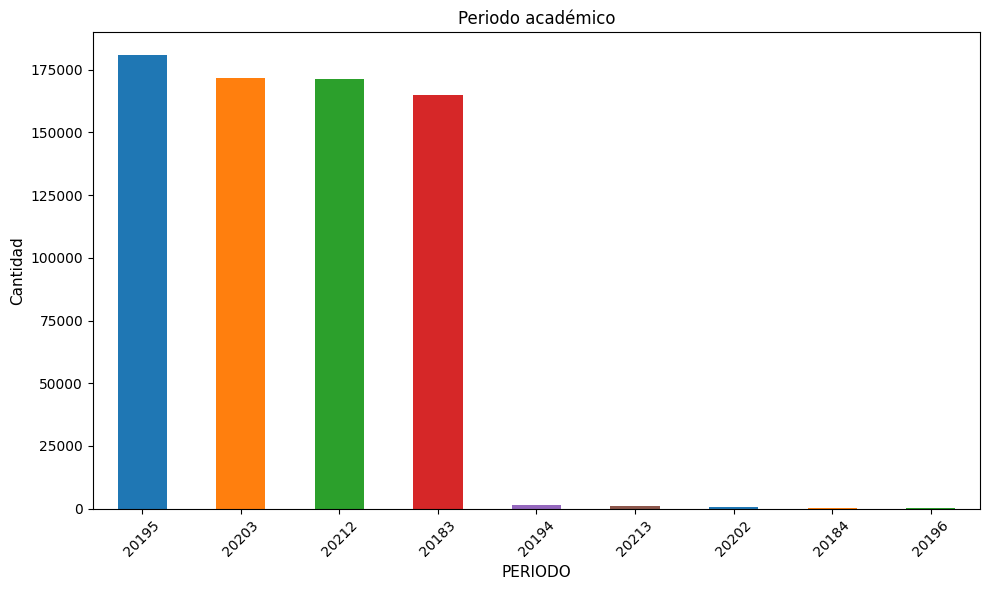

In [20]:

df_count = df['PERIODO'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
df_count.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])  # Colores personalizados

# Personalizar la gráfica
plt.title('Periodo académico', fontsize=12)  # Tamaño de título reducido
plt.xlabel('PERIODO', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [21]:
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [22]:
import plotly.express as px

df_categoricas = ['ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# paleta de colores azules para el uso del analisis univariado
Paleta_Azules = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb']
cont=1
for col in df_categoricas:
    # Contar las frecuencias de cada categoría
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']  # Renombrar las columnas

    counts['percentage'] = (counts['count'] / counts['count'].sum()) * 100
    counts['label'] = counts['count'].astype(str) + ' (' + counts['percentage'].round(1).astype(str) + '%)'
    print(f'Gráfica {cont}')

    fig = px.bar(counts, x=col, y='count', color=col, title=f'Distribución de {col}',
                 labels={col: col, 'count': 'Frecuencia'},text='label', color_discrete_sequence=Paleta_Azules, width=1000, height=600)
    fig.show()
    cont+=1

Gráfica 1


Gráfica 2


Gráfica 3


Gráfica 4


Gráfica 5


Gráfica 6


Gráfica 7


Gráfica 8


In [23]:
# Gráfico de barras apiladas para ver cómo se distribuye la variable respuesta dentro de cada categoría de las variables independientes
target='RENDIMIENTO_GLOBAL'
cont=1
for var in df_categoricas:
    # Agrupar por la variable categórica y el target para obtener las frecuencias
    counts = df.groupby([var, target]).size().reset_index(name='count')

    # Crear el gráfico de barras apiladas
    fig = px.bar(counts, x=var, y='count', color=target, barmode='stack',
                    title=f'Distribución de {var} apilada por {target}',
                    labels={var: var, 'count': 'Frecuencia', target: target})
    print(f'Gráfica {cont}')

    # Mostrar el gráfico
    fig.show()
    cont+=1

Gráfica 1


Gráfica 2


Gráfica 3


Gráfica 4


Gráfica 5


Gráfica 6


Gráfica 7


Gráfica 8


# <font color=4CBB17>**3. Limpieza y preprocesado**</font>



In [24]:
df1 = df.copy() # Se crea una copia del dataframe original

In [25]:
df1.PERIODO.value_counts()

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [26]:
# Se crea una nueva columna llamada AÑO ya que hay unas categorias muy grandes y las otras demasiado pequeñas
df1['PERIODO'] = df1['PERIODO'].astype(str)
df1['AÑO'] = ['2018' if i in ['20183', '20184']
              else '2019' if i in ['20195', '20194', '20196']
              else '2020' if i in ['20203', '20202']
              else '2021' if i in ['20212', '20213']
              else i for i in df1['PERIODO']]

In [27]:
df1.AÑO.value_counts()

,count
AÑO,
2019,182510
2021,172590
2020,172328
2018,165072


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  object
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
 12  AÑO                           

In [29]:
# Asignar a los valores nulos "No info" para variables categoricas educación de la madre, padre y valor matricula

df1.FAMI_EDUCACIONMADRE.values[df1.FAMI_EDUCACIONMADRE.isna()] = 'No info'

df1.FAMI_EDUCACIONPADRE.values[df1.FAMI_EDUCACIONPADRE.isna()] = 'No info'

df1.ESTU_VALORMATRICULAUNIVERSIDAD.values[df1.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'No info'

sum(df1.FAMI_EDUCACIONMADRE.isna()), sum(df1.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(df1.FAMI_EDUCACIONPADRE.isna())

(0, 0, 0)

In [30]:
# Se reeemplazan las categorias 'No sabe', 'No Aplica', 'No info' en una nueva llamada indeterminado
df1['FAMI_EDUCACIONMADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in df1['FAMI_EDUCACIONMADRE'].values]
df1['FAMI_EDUCACIONPADRE'] = ['Indeterminado' if i in ['No sabe', 'No Aplica', 'No info'] else i for i in df1['FAMI_EDUCACIONPADRE'].values]

In [31]:
df1.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Indeterminado,48999
Postgrado,44169
Educación profesional incompleta,27084


In [32]:
df1.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Indeterminado,28599
Técnica o tecnológica incompleta,27533


In [33]:
# Se asigna el promedio de pago de matricula para cada categoria dentro de la variable

cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0,
    'No info': -1}

# Usar map para transformar los valores
df1['ESTU_VALORMATRICULAUNIVERSIDAD'] = df1['ESTU_VALORMATRICULAUNIVERSIDAD'].map(cmap)

# Contar los valores únicos
df1['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  object 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  float64
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             692500 non-null  object 
 9   FAMI_EDUCACIONMADRE             692500 non-null  object 
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object 
 11  RENDIMIENTO_GLOBAL              692500 non-null  object 
 12  AÑO             

In [35]:
df1['ESTU_PRGM_DEPARTAMENTO'].unique()

array(['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE',
       'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO',
       'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO',
       'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS',
       'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS',
       'VAUPES', 'SAN ANDRES'], dtype=object)

>**Se va a crear una nueva variable llamada REGION, esta variable agrupa los departamentos por región**

In [36]:
# Se crea diccionario de regiones

departamentos_regiones = {
    # Región Andina
    'BOGOTÁ': 'Andina',
    'SANTANDER': 'Andina',
    'ANTIOQUIA': 'Andina',
    'HUILA': 'Andina',
    'CUNDINAMARCA': 'Andina',
    'TOLIMA': 'Andina',
    'QUINDIO': 'Andina',
    'RISARALDA': 'Andina',
    'BOYACA': 'Andina',
    'NORTE SANTANDER': 'Andina',
    'CALDAS': 'Andina',

    # Región Amazónica
    'CAQUETA': 'Amazónica',
    'PUTUMAYO': 'Amazónica',
    'GUAVIARE': 'Amazónica',
    'AMAZONAS': 'Amazónica',
    'VAUPES': 'Amazónica',

    # Región Pacífica
    'VALLE': 'Pacífica',
    'NARIÑO': 'Pacífica',
    'CAUCA': 'Pacífica',
    'CHOCO': 'Pacífica',

    # Región Caribe
    'ATLANTICO': 'Caribe',
    'SUCRE': 'Caribe',
    'BOLIVAR': 'Caribe',
    'CORDOBA': 'Caribe',
    'LA GUAJIRA': 'Caribe',
    'CESAR': 'Caribe',
    'MAGDALENA': 'Caribe',

    # Región Orinoquía
    'META': 'Orinoquía',
    'CASANARE': 'Orinoquía',
    'ARAUCA': 'Orinoquía',

    # Región Insular
    'SAN ANDRES': 'Insular'
}

# Se agrupan los departamentos en las siguientes regiones geográficas de Colombia:
# Andina, Amazónica, Pacífica, Caribe, Orinoquía e Insular y se agrega la variable REGION a df1

df1['REGION'] = df1['ESTU_PRGM_DEPARTAMENTO'].map(departamentos_regiones)

In [37]:
# Se verifica nuevamente nulos en la variable ESTU_HORASSEMANATRABAJA
df1.ESTU_HORASSEMANATRABAJA.isna().sum()

30857

In [38]:
## Asignar a los valores nulos "No info" para variable de horas que trabaja el estudiante a la semana
df1.ESTU_HORASSEMANATRABAJA.values[df1.ESTU_HORASSEMANATRABAJA.isna()] = 'No info'
sum(df1.ESTU_HORASSEMANATRABAJA.isna())

0

In [39]:
# Se asigna el promedio de horas para cada categoria dentro de la variable

emap = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 35.5,
    'No info': -1}

# Usar map para transformar los valores
df1['ESTU_HORASSEMANATRABAJA'] = df1['ESTU_HORASSEMANATRABAJA'].map(emap)

# Contar los valores únicos
df1['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,249352
0.0,116550
15.5,115857
25.5,92693
5.0,87191
-1.0,30857


In [40]:
df1['ESTU_HORASSEMANATRABAJA'].unique()

array([ 5. ,  0. , 35.5, 25.5, 15.5, -1. ])

In [41]:
# Se verifican nuevamente nulos en la variable estrato
df1.FAMI_ESTRATOVIVIENDA.isna().sum()

32137

In [42]:
## Asignar a los valores nulos "No info" para variable de estrato
df1.FAMI_ESTRATOVIVIENDA.values[df.FAMI_ESTRATOVIVIENDA.isna()] = 'No info'
sum(df1.FAMI_ESTRATOVIVIENDA.isna())

0

In [43]:
df1['FAMI_ESTRATOVIVIENDA']. unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'No info', 'Estrato 6', 'Sin Estrato'], dtype=object)

In [44]:
# Se hace un reeemplazo de nombre para hacer el nombre mas corto, sin embargo el estrato continua siendo una variable categorica ordinal
df1['FAMI_ESTRATOVIVIENDA'] = df1['FAMI_ESTRATOVIVIENDA'].replace({
    'Estrato 6': 6,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5
    })

In [45]:
df1['FAMI_ESTRATOVIVIENDA']. unique()

array([3, 4, 5, 2, 1, 'No info', 6, 'Sin Estrato'], dtype=object)

In [46]:
df1.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL',
       'AÑO', 'REGION'],
      dtype='object')

In [47]:
# Se elimina variable respuesta y dos variables categoricas que no se van a usar en el modelo
X_features = df1.drop(['RENDIMIENTO_GLOBAL','PERIODO','ESTU_PRGM_ACADEMICO','ESTU_PRGM_DEPARTAMENTO'], axis=1, inplace=False)

In [48]:
X_features.dtypes

,0
ID,int64
ESTU_VALORMATRICULAUNIVERSIDAD,float64
ESTU_HORASSEMANATRABAJA,float64
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object
ESTU_PAGOMATRICULAPROPIO,object
AÑO,object
REGION,object


> Se va a realizar un posterior modelo con 10 variables. Se procede a dummizar las categoricas

In [49]:
columnas_binarias1 = [col for col in X_features.columns if X_features[col].nunique() == 2]
columnas_binarias1

['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO']

In [50]:
X_features = pd.get_dummies(X_features, columns=columnas_binarias1, drop_first=True)
X_features

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,AÑO,REGION,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Si
0,904256,6.25,5.0,3,Técnica o tecnológica incompleta,Postgrado,2021,Andina,True,False
1,645256,3.25,0.0,3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,2021,Caribe,False,False
2,308367,3.25,35.5,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,2020,Andina,True,False
3,470353,4.75,0.0,4,Indeterminado,Secundaria (Bachillerato) completa,2019,Andina,True,False
4,989032,3.25,25.5,3,Primaria completa,Primaria completa,2021,Andina,True,False
...,...,...,...,...,...,...,...,...,...,...
692495,25096,0.75,15.5,2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,2019,Caribe,True,True
692496,754213,3.25,35.5,3,Primaria incompleta,Secundaria (Bachillerato) incompleta,2021,Andina,True,False
692497,504185,1.75,5.0,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,2018,Andina,True,True
692498,986620,3.25,5.0,1,Primaria completa,Primaria completa,2019,Andina,False,True


In [51]:
pd.set_option('display.max_columns', None)

In [52]:
# Dumización de variables independientes de más de
X_features=pd.get_dummies(X_features)
X_features

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_ESTRATOVIVIENDA_1,FAMI_ESTRATOVIVIENDA_2,FAMI_ESTRATOVIVIENDA_3,FAMI_ESTRATOVIVIENDA_4,FAMI_ESTRATOVIVIENDA_5,FAMI_ESTRATOVIVIENDA_6,FAMI_ESTRATOVIVIENDA_No info,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Indeterminado,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Indeterminado,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021,REGION_Amazónica,REGION_Andina,REGION_Caribe,REGION_Insular,REGION_Orinoquía,REGION_Pacífica
0,904256,6.25,5.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
1,645256,3.25,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
2,308367,3.25,35.5,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
3,470353,4.75,0.0,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
4,989032,3.25,25.5,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,0.75,15.5,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
692496,754213,3.25,35.5,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
692497,504185,1.75,5.0,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
692498,986620,3.25,5.0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [53]:
# Escalado de variables númericas Z-score
X_features['ESTU_VALORMATRICULAUNIVERSIDAD'] = (X_features['ESTU_VALORMATRICULAUNIVERSIDAD'] - X_features['ESTU_VALORMATRICULAUNIVERSIDAD'].mean())/X_features['ESTU_VALORMATRICULAUNIVERSIDAD'].std()
X_features['ESTU_HORASSEMANATRABAJA'] = (X_features['ESTU_HORASSEMANATRABAJA'] - X_features['ESTU_HORASSEMANATRABAJA'].mean())/X_features['ESTU_HORASSEMANATRABAJA'].std()

In [54]:
# Separar la variable respuesta o dependiente para luego convertir la columna de target (predicción) en valores discretos

y_target = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2}

# Usar map para transformar los valores
df1[y_target] = df1[y_target].map(rmap)

df1.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,AÑO,REGION
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,5.0,3,Si,Técnica o tecnológica incompleta,Postgrado,No,2,2021,Andina
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0,2021,Caribe
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,35.5,3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0,2020,Andina
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4,Si,Indeterminado,Secundaria (Bachillerato) completa,No,3,2019,Andina
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3,Si,Primaria completa,Primaria completa,No,1,2021,Andina


In [55]:
# Grafico variable respuesta

counts = df1[y_target].value_counts().reset_index()
counts.columns = [y_target, 'Count']  # Renombrar las columnas

counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100
counts['Label'] = counts['Count'].astype(str) + ' (' + counts['Percentage'].round(1).astype(str) + '%)'
print(f'Gráfica {cont}')

fig = px.bar(counts, x=y_target, y='Count', color=y_target, title=f'Distribución de {y_target}',
             labels={col: y_target, 'Count': 'Frecuencia'}, text='Label',
             color_discrete_sequence=Paleta_Azules, width=1000, height=600)

fig.show()

Gráfica 9


In [56]:
counts

,RENDIMIENTO_GLOBAL,Count,Percentage,Label
0,3,175619,25.360144,175619 (25.4%)
1,0,172987,24.980072,172987 (25.0%)
2,1,172275,24.877256,172275 (24.9%)
3,2,171619,24.782527,171619 (24.8%)


In [57]:
df1[y_target]

,RENDIMIENTO_GLOBAL
0,2
1,0
2,0
3,3
4,1
...,...
692495,2
692496,0
692497,1
692498,0


In [58]:
X_features

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_ESTRATOVIVIENDA_1,FAMI_ESTRATOVIVIENDA_2,FAMI_ESTRATOVIVIENDA_3,FAMI_ESTRATOVIVIENDA_4,FAMI_ESTRATOVIVIENDA_5,FAMI_ESTRATOVIVIENDA_6,FAMI_ESTRATOVIVIENDA_No info,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Indeterminado,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Indeterminado,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021,REGION_Amazónica,REGION_Andina,REGION_Caribe,REGION_Insular,REGION_Orinoquía,REGION_Pacífica
0,904256,1.482660,-0.994622,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
1,645256,0.191252,-1.340600,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
2,308367,0.191252,1.115842,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
3,470353,0.836956,-1.340600,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
4,989032,0.191252,0.423887,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,-0.884920,-0.268069,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
692496,754213,0.191252,1.115842,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
692497,504185,-0.454451,-0.994622,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
692498,986620,0.191252,-0.994622,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Fal